In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import math
from imblearn.over_sampling import SMOTE
from collections import Counter

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['ever_married'] = df['ever_married'].apply(lambda x:1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [ ]:
df['work_type'] = df['work_type'].astype('category', copy=False)
df['Residence_type'] = df['Residence_type'].astype('category', copy=False)
df['smoking_status'] = df['smoking_status'].astype('category', copy=False)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

In [ ]:
X = df.drop(['stroke', 'work_type_Never_worked', 'Residence_type_Urban'], axis=1)
y = df['stroke']

df_clean = pd.concat([X, y], axis=1)

In [ ]:
X.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.572407,0.160274,0.134442,0.173190,0.370254,0.154403
std,0.492578,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.494778,0.366896,0.341160,0.378448,0.482920,0.361370
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
smote = SMOTE()
X_train_scaled_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_sm))

Before SMOTE:  Counter({0: 3411, 1: 166})
After SMOTE:  Counter({0: 3411, 1: 3411})


In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state=1)
lr_model.fit(X_train_scaled_sm,y_train_sm)

y_pred_lr = lr_model.predict(X_test_scaled)

Logistic Regression Model Classification Report
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1450
           1       0.15      0.82      0.25        83

    accuracy                           0.74      1533
   macro avg       0.57      0.77      0.55      1533
weighted avg       0.94      0.74      0.81      1533



Logistic Regression Model ROC AUC:
0.774810968009971


[[1059  391]
 [  15   68]]




Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

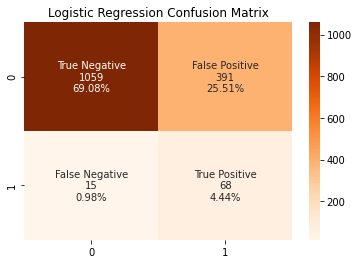

In [ ]:
print('Logistic Regression Model Classification Report')
print(classification_report(y_test, y_pred_lr))
print('\n')
print('Logistic Regression Model ROC AUC:')
print(roc_auc_score(y_test, y_pred_lr))
print('\n')

lr_cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(lr_cf_matrix)
print('\n')

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                lr_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_cf_matrix.flatten()/np.sum(lr_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_cf_matrix, annot=labels, fmt="", cmap='Oranges')

plt.title("Logistic Regression Confusion Matrix")

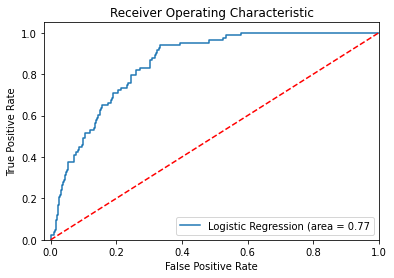

In [ ]:
lr_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_scaled))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f' % lr_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
logit_model = sm.Logit(y_train_sm, X_train_scaled_sm)
log_model = logit_model.fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.531496
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6822
Model:                          Logit   Df Residuals:                     6809
Method:                           MLE   Df Model:                           12
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.2332
Time:                        18:39:07   Log-Likelihood:                -3625.9
converged:                       True   LL-Null:                       -4728.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5125      0.062     -8.309      0.000      -0.633      -0.392
x2             4.2670      0.

In [ ]:
lr_model.coef_

array([[-4.24657475e-01,  7.04871544e+00,  3.34358314e-01,
         1.64091300e-01,  5.34998024e-02,  4.31684823e-01,
         6.16177254e-02,  5.40061934e-01, -3.63858213e-03,
         1.64476293e+00,  1.19664686e-01, -1.97271089e-01,
         1.42557833e-01]])